## **Task 1**

In [ ]:
!pip install 'aif360[LFR]'

     |████████████████████████████████| 175 kB 5.0 MB/s 
     |████████████████████████████████| 564 kB 51.8 MB/s 
  Created wheel for memory-profiler: filename=memory_profiler-0.60.0-py3-none-any.whl size=31284 sha256=d9e03f6c8ae65f9ae139ac430d60a3eb777a40462d1a2f67a42cd9077469ed03
  Stored in directory: /root/.cache/pip/wheels/67/2b/fb/326e30d638c538e69a5eb0aa47f4223d979f502bbdb403950f
Successfully built memory-profiler


In [ ]:
cd/usr/local/lib/python3.7/dist-packages/aif360/data/raw/german

/usr/local/lib/python3.7/dist-packages/aif360/data/raw/german


Loading adult dataset

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc

--2022-05-11 15:22:53--  https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79793 (78K) [application/x-httpd-php]
Saving to: ‘german.data’

german.data         100%[===================>]  77.92K  --.-KB/s    in 0.1s    

2022-05-11 15:22:53 (590 KB/s) - ‘german.data’ saved [79793/79793]

--2022-05-11 15:22:53--  https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4679 (4.6K) [application/x-httpd-php]
Saving to: ‘german.doc’

german.doc          100%[===================>]   4.57K  --.-KB/s    in 0s  

In [ ]:
!pip3 install torch

In [ ]:
!pip install fairlearn

     |████████████████████████████████| 177 kB 5.1 MB/s 


In [ ]:
#Code written by V Sharmanska. All rights reserved.
#STEP 1: Import the AIF360 library and set the random seed.
import numpy as np
from aif360.datasets import GermanDataset
from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions import load_preproc_data_german
from aif360.metrics import ClassificationMetric
from aif360.algorithms.preprocessing.reweighing import Reweighing
import pdb
from sklearn.preprocessing import StandardScaler  #MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import *
import matplotlib.pyplot as plt
np.random.seed(0)

In [ ]:
#STEP 2: We define where's the bias in the features of our dataset.

privileged_groups = [{'sex': 1.0}]
unprivileged_groups = [{'sex': 0.0}]
dataset_orig = load_preproc_data_german(['sex'])


#STEP 3: We split between training and test set.
train, test = dataset_orig.split([0.7], shuffle=True)
print("training data size", train.features.shape)
print("dataset feature names", train.feature_names)

#Normalize the dataset, both train and test. This should always be done in any machine learning pipeline!
scale_orig = StandardScaler()
X_train = scale_orig.fit_transform(train.features)
y_train = train.labels.ravel()

X_test = scale_orig.transform(test.features) 
y_test = test.labels.ravel()

training data size (700, 11)
dataset feature names ['age', 'sex', 'credit_history=Delay', 'credit_history=None/Paid', 'credit_history=Other', 'savings=500+', 'savings=<500', 'savings=Unknown/None', 'employment=1-4 years', 'employment=4+ years', 'employment=Unemployed']


In [ ]:
#Code adopted from https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/



from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score 

# define dataset

# define models and parameters
model = LogisticRegression()
solvers = [ 'liblinear']
penalty = ['l2']
c_values = np.logspace(np.log10(100),np.log10(0.00001),num=20)
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
best_model = grid_result.best_estimator_
yhat = best_model.predict(X_test)
	# evaluate the model
acc = accuracy_score(y_test, yhat)
	# store the result
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('accuracy',"%f (%f) with: %r" % (mean, stdev, param))

Best: 0.738571 using {'C': 0.003792690190732254, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.731429 (0.019483) with: {'C': 100.0, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.731429 (0.019483) with: {'C': 42.81332398719393, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.731429 (0.019483) with: {'C': 18.329807108324356, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.731429 (0.019483) with: {'C': 7.847599703514615, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.731429 (0.019483) with: {'C': 3.3598182862837827, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.731429 (0.019483) with: {'C': 1.438449888287663, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.731429 (0.019483) with: {'C': 0.6158482110660267, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.731429 (0.019483) with: {'C': 0.26366508987303583, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.731429 (0.019483) with: {'C': 0.11288378916846895, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.73142

In [ ]:
learner = LogisticRegression(solver='liblinear', random_state=1, C = 0.01, penalty = "l2") 
learner.fit(X_train,y_train)
predictions = learner.predict(X_test)

test_pred = test.copy()
test_pred.labels = predictions
print("Accuracy", sum(predictions==y_test)/len(y_test))
metric = ClassificationMetric(test, test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
metric_arrs = {}
metric_arrs['eq_opp_diff']=(metric.equal_opportunity_difference())
print(metric_arrs)

Accuracy 0.6266666666666667
{'eq_opp_diff': -0.1428571428571429}


In [ ]:
from sklearn.model_selection import cross_validate
learner = LogisticRegression(solver='liblinear', random_state=1, C = 0.00004, penalty = "l2") 
learner.fit(X_train,y_train)
predictions = learner.predict(X_test)
cv_results = cross_validate(learner,X_train,y_train,cv = 5,return_estimator = True)

cv_results['test_score']
cv_model = cv_results['estimator'][list(cv_results['test_score']).index(max(cv_results['test_score']))]

cv_predictions = test.copy()
cv_predictions.labels = cv_model.predict(test.features).reshape(-1,1)

# Measure Fairness metrics
metric = ClassificationMetric(test, cv_predictions, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
metric_arrs = {}
metric_arrs['eq_opp_diff']=(metric.equal_opportunity_difference())
metric_arrs['avg_odds_diff']=(metric.average_odds_difference())
metric_arrs['bal_acc']=((metric.true_positive_rate() + metric.true_negative_rate()) / 2)
metric_arrs['disp_imp']=(metric.disparate_impact())
print(metric_arrs)

{'eq_opp_diff': 0.0, 'avg_odds_diff': 0.0, 'bal_acc': 0.5, 'disp_imp': 1.0}


Logistic Regression With PyTorch

In [ ]:
import torch
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.utils.data as Data

In [ ]:
class LogisticRegression_torch(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression_torch, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = torch.sigmoid(self.linear(x))
        return outputs

In [ ]:
GPU = True
device_idx = 0
if GPU:
    device = torch.device("cuda:" + str(device_idx) if torch.cuda.is_available() else "cpu")
else:
    device = torch.device("cpu")
BATCH_SIZE = 64
learning_rate = 0.0001

# building a DataTensor
train_dataset = Data.TensorDataset(torch.tensor(X_train).float(), torch.Tensor(y_train).float())

if device == 0:
    num_workers = 2
else:
    num_workers = 0

# Data Loader for training the model
loader_train = Data.DataLoader(
    dataset=train_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=num_workers)

In [ ]:
#Code adopted from https://www.analyticsvidhya.com/blog/2021/07/perform-logistic-regression-with-pytorch-seamlessly/
criterion = torch.nn.BCELoss(reduction='sum')
epochs = 3
accuracies = []
metrix = {}
lambdas = [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9]
lambdas = np.concatenate((np.array(lambdas), np.linspace(1, 100, num=100)))
for r_lambda in lambdas:
    print('Lambda:', r_lambda,'\n')
    model = LogisticRegression_torch(X_train.shape[1], 1)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)  
    for epoch in range(epochs):
        train_loss = 0.0
        for i, (x, y) in enumerate(loader_train):
        #using input and labels for training 

            inputs = Variable(x.to(device))
            labels = Variable(y.to(device))

          
            optimizer.zero_grad()

            # using input getting the output
            outputs = model(inputs)

            # Regularization factor
            reg = 0
            for param in model.parameters():
                reg += 0.5 * (param ** 2).sum()

            # find loss for output
            loss = criterion(outputs.reshape(outputs.shape[0]), labels) + \
                r_lambda * reg
                
            train_loss += loss.item()
            
            # get gradients w.r.t to parameters
            loss.backward()
            
            # update parameters
            optimizer.step()
        

        print('epoch [{}/{}], Training loss:{:.6f}'.format(
            epoch + 1, 
            epochs, 
            train_loss / len(loader_train.dataset))) #training has finished 
    with torch.no_grad():
        model.eval()
        out = model(Variable(torch.Tensor(X_test).to(device))).detach().cpu()
        pred = (out >= 0.5).int().numpy().squeeze()
        accuracy = sum((y_test == pred))/len(y_test)
    #accuracy from validation

    print('Accuracy: ', accuracy,'\n')
    accuracies.append(accuracy)

    test_pred = test.copy()
    test_pred.labels = pred.reshape(-1,1)
    metric = ClassificationMetric(test, test_pred,unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
    metric_arrs = {}
    metric_arrs['eq_opp_diff']=(metric.equal_opportunity_difference())
    print(metric_arrs)

    metrix[r_lambda] = {}
    metrix[r_lambda]['accuracy'] = accuracy
    metrix[r_lambda]['privilaged'] = metric.performance_measures(privileged=True)
    metrix[r_lambda]['unprivilaged'] = metric.performance_measures(privileged=False)

    met = metric.binary_confusion_matrix(privileged=True)
    PR_priv = (met['TP'] + met['FP']) / (met['TP'] + met['FP'] + met['TN'] + met['FN'])
    metrix[r_lambda]['privilaged']['PR'] = PR_priv

    met = metric.binary_confusion_matrix(privileged=False)
    PR_unpriv = (met['TP'] + met['FP']) / (met['TP'] + met['FP'] + met['TN'] + met['FN'])
    metrix[r_lambda]['unprivilaged']['PR'] = PR_unpriv

Lambda: 0.0 

epoch [1/3], Training loss:0.747605
epoch [2/3], Training loss:0.702193
epoch [3/3], Training loss:0.658749
Accuracy:  0.3433333333333333 

{'eq_opp_diff': 0.4240719910011248}
Lambda: 1e-05 

epoch [1/3], Training loss:0.632913
epoch [2/3], Training loss:0.591923
epoch [3/3], Training loss:0.552601
Accuracy:  0.5166666666666667 

{'eq_opp_diff': -0.2169572553430822}
Lambda: 0.0001 

epoch [1/3], Training loss:0.473499
epoch [2/3], Training loss:0.439220
epoch [3/3], Training loss:0.405990
Accuracy:  0.44 

{'eq_opp_diff': 0.24718785151856026}
Lambda: 0.001 

epoch [1/3], Training loss:0.714762
epoch [2/3], Training loss:0.673389
epoch [3/3], Training loss:0.633124
Accuracy:  0.2966666666666667 

{'eq_opp_diff': 0.04541619797525315}
Lambda: 0.01 

epoch [1/3], Training loss:0.673420
epoch [2/3], Training loss:0.632255
epoch [3/3], Training loss:0.592610
Accuracy:  0.49666666666666665 

{'eq_opp_diff': -0.11825084364454452}
Lambda: 0.1 

epoch [1/3], Training loss:0.844289


Text(0, 0.5, 'Accuracy')

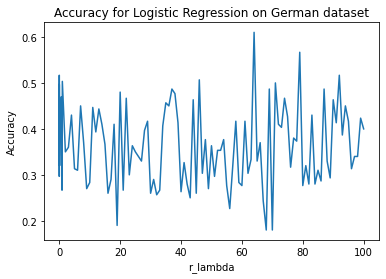

In [ ]:
plt.plot(lambdas, accuracies)
plt.title('Accuracy for Logistic Regression on German dataset')
plt.xlabel('r_lambda')
plt.ylabel('Accuracy')

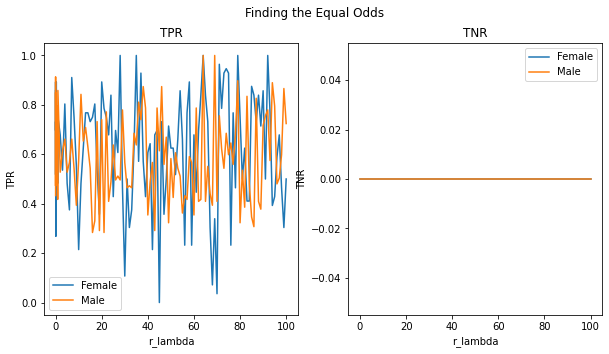

In [ ]:
TPR_priv = []
TPR_non_priv = []
TNR_priv = []
TNR_non_priv = []
for l in metrix:
    TPR_priv.append(metrix[l]['privilaged']['TPR'])
    TPR_non_priv.append(metrix[l]['unprivilaged']['TPR'])
    TNR_priv.append(metrix[l]['privilaged']['TNR'])
    TNR_non_priv.append(metrix[l]['unprivilaged']['TNR'])

fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Finding the Equal Odds')
axs[0].plot(lambdas, TPR_non_priv)
axs[0].plot(lambdas, TPR_priv)
axs[0].set_title('TPR')
axs[0].set(xlabel='r_lambda', ylabel='TPR')
axs[0].legend(['Female', 'Male'])

axs[1].plot(lambdas, TNR_non_priv)
axs[1].plot(lambdas, TNR_priv)
axs[1].set_title('TNR')
axs[1].set(xlabel='r_lambda', ylabel='TNR')
axs[1].legend(['Female', 'Male'])

## **TASK 2**

In [ ]:
RW = Reweighing(unprivileged_groups=unprivileged_groups, 
                privileged_groups=privileged_groups)

train_rw = RW.fit_transform(train)

train_weights = train_rw.instance_weights

In [ ]:
# Code adopted from https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score 

# define dataset


# define models and parameters
model = LogisticRegression()
solvers = [ 'liblinear']
penalty = ['l2']
c_values = np.logspace(np.log10(100),np.log10(0.00001),num=20)
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
best_model = grid_result.best_estimator_
yhat = best_model.predict(X_test)
	# evaluate the model
acc = accuracy_score(y_test, yhat)
	# store the result
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('accuracy',"%f (%f) with: %r" % (mean, stdev, param))

Best: 0.738571 using {'C': 0.003792690190732254, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.731429 (0.019483) with: {'C': 100.0, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.731429 (0.019483) with: {'C': 42.81332398719393, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.731429 (0.019483) with: {'C': 18.329807108324356, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.731429 (0.019483) with: {'C': 7.847599703514615, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.731429 (0.019483) with: {'C': 3.3598182862837827, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.731429 (0.019483) with: {'C': 1.438449888287663, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.731429 (0.019483) with: {'C': 0.6158482110660267, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.731429 (0.019483) with: {'C': 0.26366508987303583, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.731429 (0.019483) with: {'C': 0.11288378916846895, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.73142

In [ ]:
from sklearn.model_selection import cross_validate
learner = LogisticRegression(solver='liblinear', random_state=1, C = 0.01, penalty = "l2") 
learner.fit(X_train,y_train)
predictions = learner.predict(X_test)
cv_results = cross_validate(learner,X_train,y_train,cv =5,return_estimator = True)

cv_results['test_score']
cv_model = cv_results['estimator'][list(cv_results['test_score']).index(max(cv_results['test_score']))]

cv_predictions = test.copy()
cv_predictions.labels = cv_model.predict(test.features).reshape(-1,1)

# Measure Fairness metrics
metric = ClassificationMetric(test, cv_predictions, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
metric_arrs = {}
metric_arrs['eq_opp_diff']=(metric.equal_opportunity_difference())
metric_arrs['avg_odds_diff']=(metric.average_odds_difference())
metric_arrs['bal_acc']=((metric.true_positive_rate() + metric.true_negative_rate()) / 2)
metric_arrs['disp_imp']=(metric.disparate_impact())
print(metric_arrs)

{'eq_opp_diff': 0.0, 'avg_odds_diff': 0.0, 'bal_acc': 0.5, 'disp_imp': 1.0}


In [ ]:
# weight Tensor
weights = torch.FloatTensor(train_rw.instance_weights)

BATCH_SIZE = 64
learning_rate = 0.0001


# weight and reweight with tensordataset
rw_train_dataset = Data.TensorDataset(torch.tensor(X_train).float(), 
                                      torch.Tensor(y_train).float(), 
                                      weights)
# Loading data 
loader_train = Data.DataLoader(
    dataset=rw_train_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=False, num_workers=num_workers)

In [ ]:
#Code adopted from https://www.analyticsvidhya.com/blog/2021/07/perform-logistic-regression-with-pytorch-seamlessly/
epochs = 5
accuracies = []
metrix_rw = {}
lambdas = [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1]
lambdas = np.concatenate((np.array(lambdas), np.linspace(1, 10, num=10)))
for r_lambda in lambdas:
    model = LogisticRegression_torch(X_train.shape[1], 1)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)
    for epoch in range(epochs):
        train_loss = 0.0
        for i, (x, y, w) in enumerate(loader_train):
        

            inputs = Variable(x.to(device))
            labels = Variable(y.to(device))

             
           
            optimizer.zero_grad()

            
            outputs = model(inputs)

            # Regularization
            reg = 0
            for param in model.parameters():
                reg += 0.5 * (param ** 2).mean()
                #reg += param.abs().sum()
            # r_lambda = 0
            
            # criterion
            criterion = torch.nn.BCELoss(weight=w, reduction='sum')
            # get loss for the predicted output
            loss = criterion(outputs.reshape(outputs.shape[0]), labels) + \
                r_lambda * reg
            
                
            train_loss += loss.item()
            
            # get gradients w.r.t to parameters
            loss.backward()
            
            # update parameters
            optimizer.step()
        #training done

        print('epoch [{}/{}], Training loss:{:.6f}'.format(
            epoch + 1, 
            epochs, 
            train_loss / len(loader_train.dataset)))
    with torch.no_grad():
        model.eval()
        out = model(Variable(torch.Tensor(X_test).to(device))).detach().cpu()
        pred = (out >= 0.5).int().numpy().squeeze()
        accuracy = sum((y_test == pred))/len(y_test)
        print('Accuracy: ', accuracy)
        accuracies.append(accuracy)
#testing done
    test_pred = test.copy()
    test_pred.labels = pred.reshape(-1,1)
    metric_rew = ClassificationMetric(test, test_pred,unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
    metric_arrs = {}
    metric_arrs['eq_opp_diff']=(metric.equal_opportunity_difference())
    print(metric_arrs)
    
    metrix_rw[r_lambda] = {}
    metrix_rw[r_lambda]['accuracy'] = accuracy
    metrix_rw[r_lambda]['privilaged'] = metric_rew.performance_measures(privileged=True)
    metrix_rw[r_lambda]['unprivilaged'] = metric_rew.performance_measures(privileged=False)

    met = metric_rew.binary_confusion_matrix(privileged=True)
    PR_priv = (met['TP'] + met['FP']) / (met['TP'] + met['FP'] + met['TN'] + met['FN'])
    metrix_rw[r_lambda]['privilaged']['PR'] = PR_priv

    met = metric_rew.binary_confusion_matrix(privileged=False)
    PR_unpriv = (met['TP'] + met['FP']) / (met['TP'] + met['FP'] + met['TN'] + met['FN'])
    metrix_rw[r_lambda]['unprivilaged']['PR'] = PR_unpriv

epoch [1/5], Training loss:0.651239
epoch [2/5], Training loss:0.610574
epoch [3/5], Training loss:0.571313
epoch [4/5], Training loss:0.533404
epoch [5/5], Training loss:0.496799
Accuracy:  0.44333333333333336
{'eq_opp_diff': 0.0}
epoch [1/5], Training loss:0.811868
epoch [2/5], Training loss:0.766063
epoch [3/5], Training loss:0.721652
epoch [4/5], Training loss:0.678611
epoch [5/5], Training loss:0.636914
Accuracy:  0.3233333333333333
{'eq_opp_diff': 0.0}
epoch [1/5], Training loss:0.753092
epoch [2/5], Training loss:0.707432
epoch [3/5], Training loss:0.663466
epoch [4/5], Training loss:0.621136
epoch [5/5], Training loss:0.580384
Accuracy:  0.48
{'eq_opp_diff': 0.0}
epoch [1/5], Training loss:0.811393
epoch [2/5], Training loss:0.765865
epoch [3/5], Training loss:0.721865
epoch [4/5], Training loss:0.679351
epoch [5/5], Training loss:0.638274
Accuracy:  0.35
{'eq_opp_diff': 0.0}
epoch [1/5], Training loss:0.944258
epoch [2/5], Training loss:0.894019
epoch [3/5], Training loss:0.84

Text(0, 0.5, 'Accuracy')

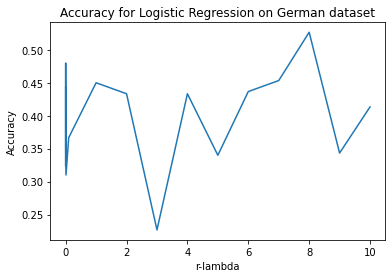

In [ ]:
plt.plot(lambdas, accuracies)
plt.title('Accuracy for Logistic Regression on German dataset')
plt.xlabel('r-lambda')
plt.ylabel('Accuracy')

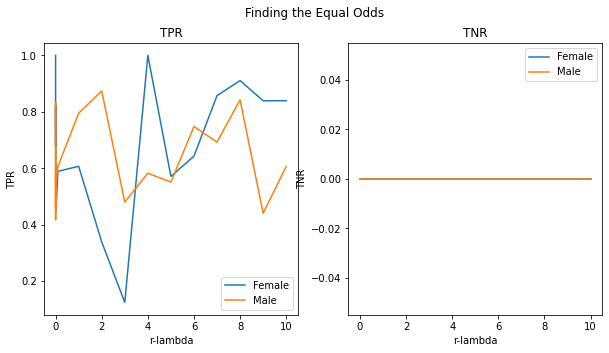

In [ ]:
TPR_priv_rw = []
TPR_non_priv_rw = []
TNR_priv_rw = []
TNR_non_priv_rw = []
for l in metrix_rw:
    TPR_priv_rw.append(metrix_rw[l]['privilaged']['TPR'])
    TPR_non_priv_rw.append(metrix_rw[l]['unprivilaged']['TPR'])
    TNR_priv_rw.append(metrix_rw[l]['privilaged']['TNR'])
    TNR_non_priv_rw.append(metrix_rw[l]['unprivilaged']['TNR'])

fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Finding the Equal Odds')
axs[0].plot(lambdas, TPR_non_priv_rw)
axs[0].plot(lambdas, TPR_priv_rw)
axs[0].set_title('TPR')
axs[0].set(xlabel='r-lambda', ylabel='TPR')
axs[0].legend(['Female', 'Male'])

axs[1].plot(lambdas, TNR_non_priv_rw)
axs[1].plot(lambdas, TNR_priv_rw)
axs[1].set_title('TNR')
axs[1].set(xlabel='r-lambda', ylabel='TNR')
axs[1].legend(['Female', 'Male'])

[(0.2, 1.0)]

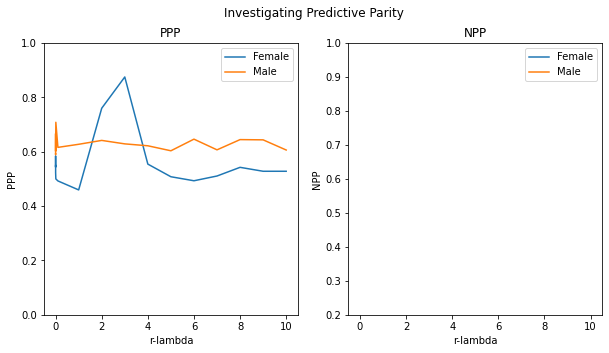

In [ ]:
PPP_priv_rw = []
PPP_non_priv_rw = []
NPP_priv_rw = []
NPP_non_priv_rw = []
for l in metrix_rw:
    PPP_priv_rw.append(metrix_rw[l]['privilaged']['PPV'])
    PPP_non_priv_rw.append(metrix_rw[l]['unprivilaged']['PPV'])
    NPP_priv_rw.append(metrix_rw[l]['privilaged']['NPV'])
    NPP_non_priv_rw.append(metrix_rw[l]['unprivilaged']['NPV'])

fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Investigating Predictive Parity')
axs[0].plot(lambdas, PPP_non_priv_rw)
axs[0].plot(lambdas, PPP_priv_rw)
axs[0].set_title('PPP')
axs[0].set(xlabel='r-lambda', ylabel='PPP')
axs[0].legend(['Female', 'Male'])
axs[0].set(ylim=(0,1))

axs[1].plot(lambdas, NPP_non_priv_rw)
axs[1].plot(lambdas, NPP_priv_rw)
axs[1].set_title('NPP')
axs[1].set(xlabel='r-lambda', ylabel='NPP')
axs[1].legend(['Female', 'Male'])
axs[1].set(ylim=(0.2,1))

# **Task 3**

## Model selection

In [ ]:
BATCH_SIZE = 32
learning_rate = 0.0001


if device == 0:
    num_workers = 2
else:
    num_workers = 0


def get_loader(x_train, y_train, W):
    train_dataset = Data.TensorDataset(torch.tensor(x_train).float(), 
                                      torch.Tensor(y_train).float(), 
                                      W.float())
    
    return Data.DataLoader(dataset=train_dataset,
                           batch_size=BATCH_SIZE, 
                           shuffle=True, num_workers=num_workers)
  

In [ ]:
#reweighihting
W = torch.FloatTensor(train_rw.instance_weights)
loader_train = get_loader(X_train, y_train, W)

In [ ]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = torch.sigmoid(self.linear(x))
        return outputs

In [ ]:
#Code adopted from https://www.analyticsvidhya.com/blog/2021/07/perform-logistic-regression-with-pytorch-seamlessly/
r_lambda = 24
num_splits = 5
ACC=[]
for split in range(num_splits):
    
    
    loader_train = get_loader(X_train, y_train, W)
    model = LogisticRegression_torch(X_train.shape[1], 1)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

    for epoch in range(epochs):
        train_loss = 0.0
        for i, (x, y, w) in enumerate(loader_train):
        

            inputs = Variable(x.to(device))
            labels = Variable(y.to(device))

            
            optimizer.zero_grad()

           
            outputs = model(inputs)

            # Regularization
            reg = 0
            for param in model.parameters():
                reg += 0.5 * (param ** 2).mean()
            
            
            criterion = torch.nn.BCELoss(weight=w, reduction='sum')
            # get loss for the predicted output
            loss = criterion(outputs.reshape(outputs.shape[0]), labels) + \
                r_lambda * reg
            
                
            train_loss += loss.item()
            
            
            loss.backward()
            
            
            optimizer.step()
        

        print('epoch [{}/{}], Training loss:{:.6f}'.format(
            epoch + 1, 
            epochs, 
            train_loss / len(loader_train.dataset)))
        #training finish
    with torch.no_grad():
        model.eval()
        out = model(Variable(torch.Tensor(X_test).to(device))).detach().cpu()
        pred = (out >= 0.5).int().numpy().squeeze()
        accuracy = sum((y_test == pred))/len(y_test)

    ACC.append(accuracy)

    
print('\nAccuracy:')
print('Mean:', np.mean(ACC), 'S.D.:', np.std(ACC))

epoch [1/5], Training loss:0.905740
epoch [2/5], Training loss:0.841403
epoch [3/5], Training loss:0.785172
epoch [4/5], Training loss:0.736090
epoch [5/5], Training loss:0.693161
epoch [1/5], Training loss:0.609826
epoch [2/5], Training loss:0.584777
epoch [3/5], Training loss:0.562726
epoch [4/5], Training loss:0.543295
epoch [5/5], Training loss:0.526093
epoch [1/5], Training loss:0.825845
epoch [2/5], Training loss:0.776204
epoch [3/5], Training loss:0.732472
epoch [4/5], Training loss:0.693709
epoch [5/5], Training loss:0.659454
epoch [1/5], Training loss:0.800366
epoch [2/5], Training loss:0.755119
epoch [3/5], Training loss:0.715111
epoch [4/5], Training loss:0.679644
epoch [5/5], Training loss:0.648313
epoch [1/5], Training loss:0.758889
epoch [2/5], Training loss:0.713389
epoch [3/5], Training loss:0.673424
epoch [4/5], Training loss:0.638565
epoch [5/5], Training loss:0.607977

Accuracy:
Mean: 0.43 S.D.: 0.05711586664161038


## EXTRA TASK

Analysis of algorithmic fairness methods beyond binary sensitive features, for
example, using Race. 

In [ ]:
# Priviled are the white male
privileged_groups = [{'sex': 1, 'age': 1}]
unprivileged_groups = [{'sex': 1, 'age': 0}, {'sex': 0, 'age': 0}, {'sex': 0, 'age': 1}]

In [ ]:
# Code adopted from https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score 

# define dataset


# define models and parameters
model = LogisticRegression()
solvers = [ 'liblinear']
penalty = ['l2']
c_values = np.logspace(np.log10(100),np.log10(0.00001),num=20)
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
best_model = grid_result.best_estimator_
yhat = best_model.predict(X_test)
	# evaluate the model
acc = accuracy_score(y_test, yhat)
	# store the result
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('accuracy',"%f (%f) with: %r" % (mean, stdev, param))

Best: 0.738571 using {'C': 0.003792690190732254, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.731429 (0.019483) with: {'C': 100.0, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.731429 (0.019483) with: {'C': 42.81332398719393, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.731429 (0.019483) with: {'C': 18.329807108324356, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.731429 (0.019483) with: {'C': 7.847599703514615, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.731429 (0.019483) with: {'C': 3.3598182862837827, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.731429 (0.019483) with: {'C': 1.438449888287663, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.731429 (0.019483) with: {'C': 0.6158482110660267, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.731429 (0.019483) with: {'C': 0.26366508987303583, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.731429 (0.019483) with: {'C': 0.11288378916846895, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.73142